# DAV Experiment_2
**Ria Khetani D11AD_34**

**Aim**: Simple Linear Regression in Python

**Lab Objectives**: To understand the use of regression Techniques in data analytics applications.

**Lab Outcomes**: Implement various Regression techniques for prediction.

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the best-fitting linear equation that describes the relationship between the variables.

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data.

Here:
Y is the dependent variable.

X is the independent variable.

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

Equation : y = mx + c This is the simple linear regression equation where c is the constant and m is the slope and describes the relationship between x (independent variable) and y (dependent variable). The coefficient can be positive or negative and is the degree of change in the dependent variable for every 1 unit of change in the independent variable.

β0 (y-intercept) and β1 (slope) are the coefficients whose values represent the accuracy of predicted values with the actual values.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [4]:
Data = pd.read_csv('Salary_Data.csv')
df = pd.DataFrame(Data,columns= ["YearsExperience","Salary"])
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#statistical information about dataset
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [19]:
#check if there are any null values, luckily no null values in my case
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
#reshaping the data
X = df["YearsExperience"].values.reshape(-1,1)
y = df["Salary"].values.reshape(-1,1)


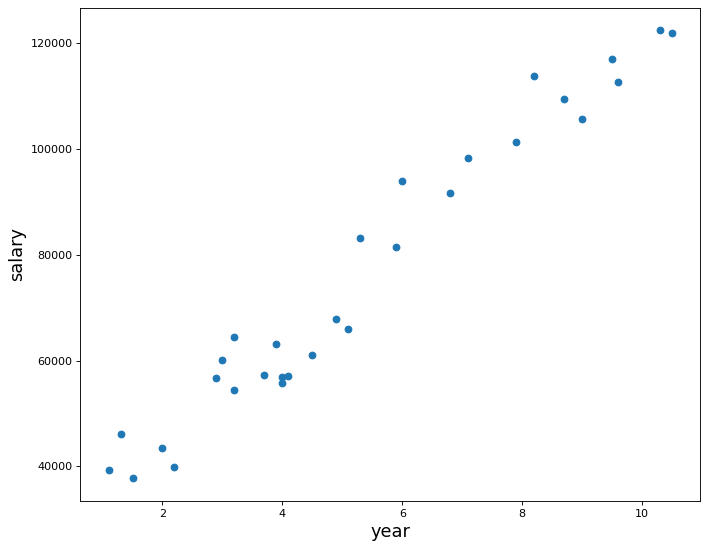

In [7]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(X,y)
plt.xlabel("year",size = 16)
plt.ylabel("salary",size = 16)
plt.show()

In [8]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
#make the model & fit the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
#predict values from test dataset
y_predict = regressor.predict(X_test)
y_predict = y_predict.round(0)
y_predict

array([[115790.],
       [ 71498.],
       [102597.],
       [ 75268.],
       [ 55478.],
       [ 60190.]])

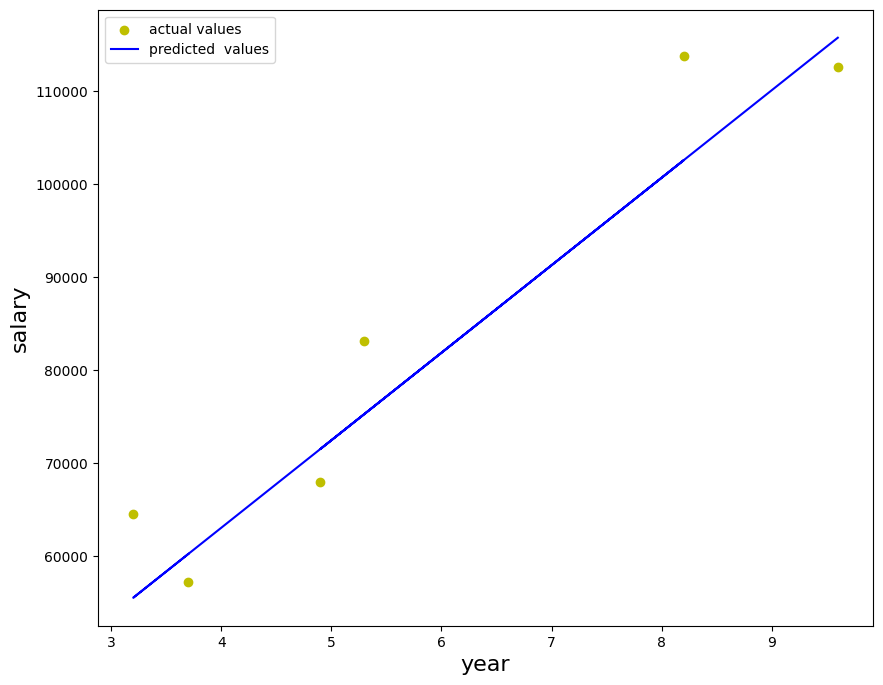

In [12]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,c = "y",label = "actual values")
plt.plot(X_test,y_predict,c = "b", label = "predicted  values")
plt.xlabel("year",size = 16)
plt.ylabel("salary",size = 16)
plt.legend()
plt.show()

# Linear Regression in R:

In [7]:
library(ggplot2)
library(dplyr);

In [8]:
#creating a dataframe
csv_file_path <- "Salary_Data.csv"
my_data <- read.csv(csv_file_path)
str(my_data)

'data.frame':	30 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary         : num  39343 46205 37731 43525 39891 ...


'data.frame':	30 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary         : num  39343 46205 37731 43525 39891 ...


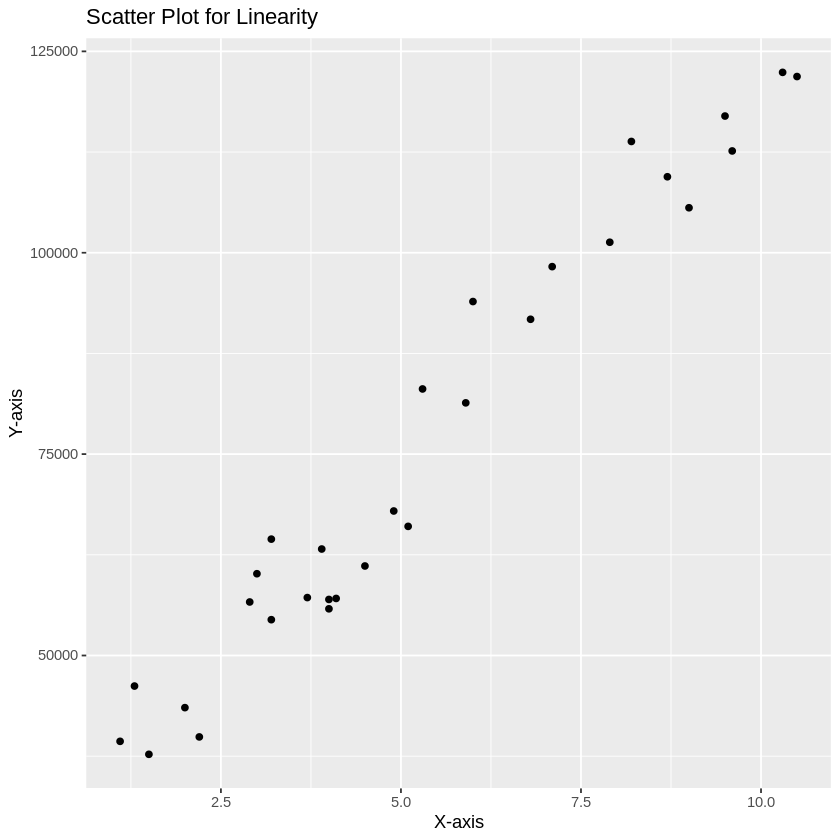

In [10]:

str(my_data)
ggplot(my_data, aes(x = YearsExperience, y = Salary)) +
  geom_point() +
  labs(title = "Scatter Plot for Linearity", x = "X-axis", y = "Y-axis")

In [12]:
#creating a model
model <- lm(Salary ~ YearsExperience, data = my_data)

#summary of the model
summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7958.0 -4088.5  -459.9  3372.6 11448.0 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      25792.2     2273.1   11.35 5.51e-12 ***
YearsExperience   9450.0      378.8   24.95  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5788 on 28 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9554 
F-statistic: 622.5 on 1 and 28 DF,  p-value: < 2.2e-16


In [13]:
#predicting values
new_data <- data.frame(YearsExperience = c(8, 9, 10))
predicted_salaries <- predict(model, newdata = new_data)
print(predicted_salaries)

       1        2        3 
101391.9 110841.9 120291.8 


`geom_smooth()` using formula = 'y ~ x'


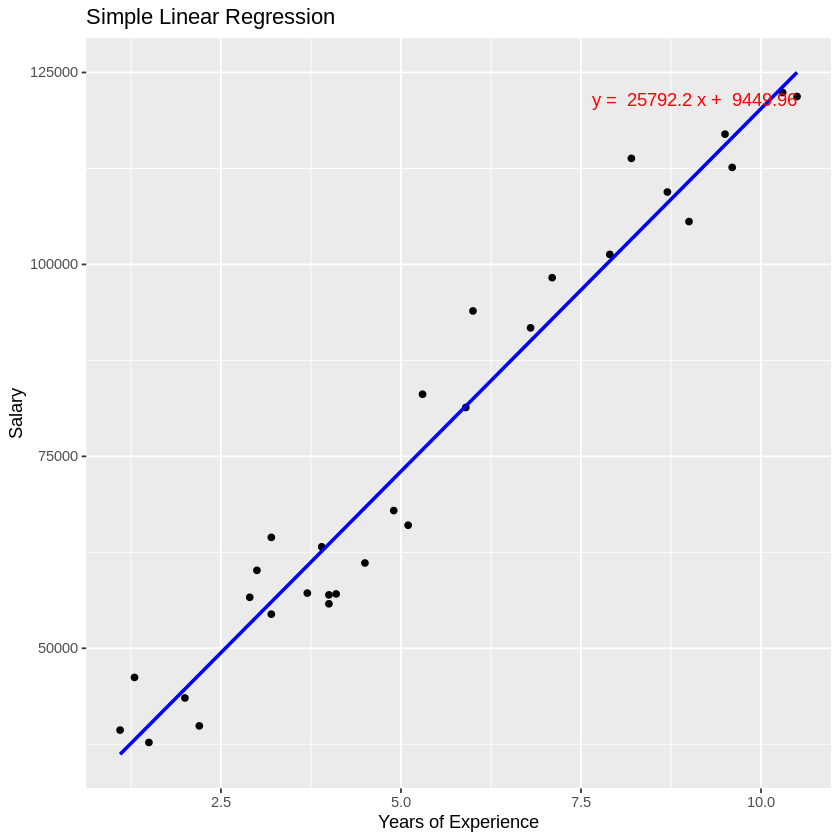

In [14]:
#visualization
ggplot(my_data, aes(x = YearsExperience, y = Salary)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Simple Linear Regression",
       x = "Years of Experience",
       y = "Salary") +
  annotate("text", x = max(my_data$YearsExperience), y = max(my_data$Salary),
           label = paste("y = ", round(coef(model)[1], 2), "x + ", round(coef(model)[2], 2)),
           hjust = 1, vjust = 1, col = "red")

##Conclusion:
Understood the concept of Simple Linear Regression.

Explored the packages in Python and R.

Performed Simple Linear Regression using the Libraries in Python and R.

